## Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('H:/ExcelR Data Science/datasets_BA/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


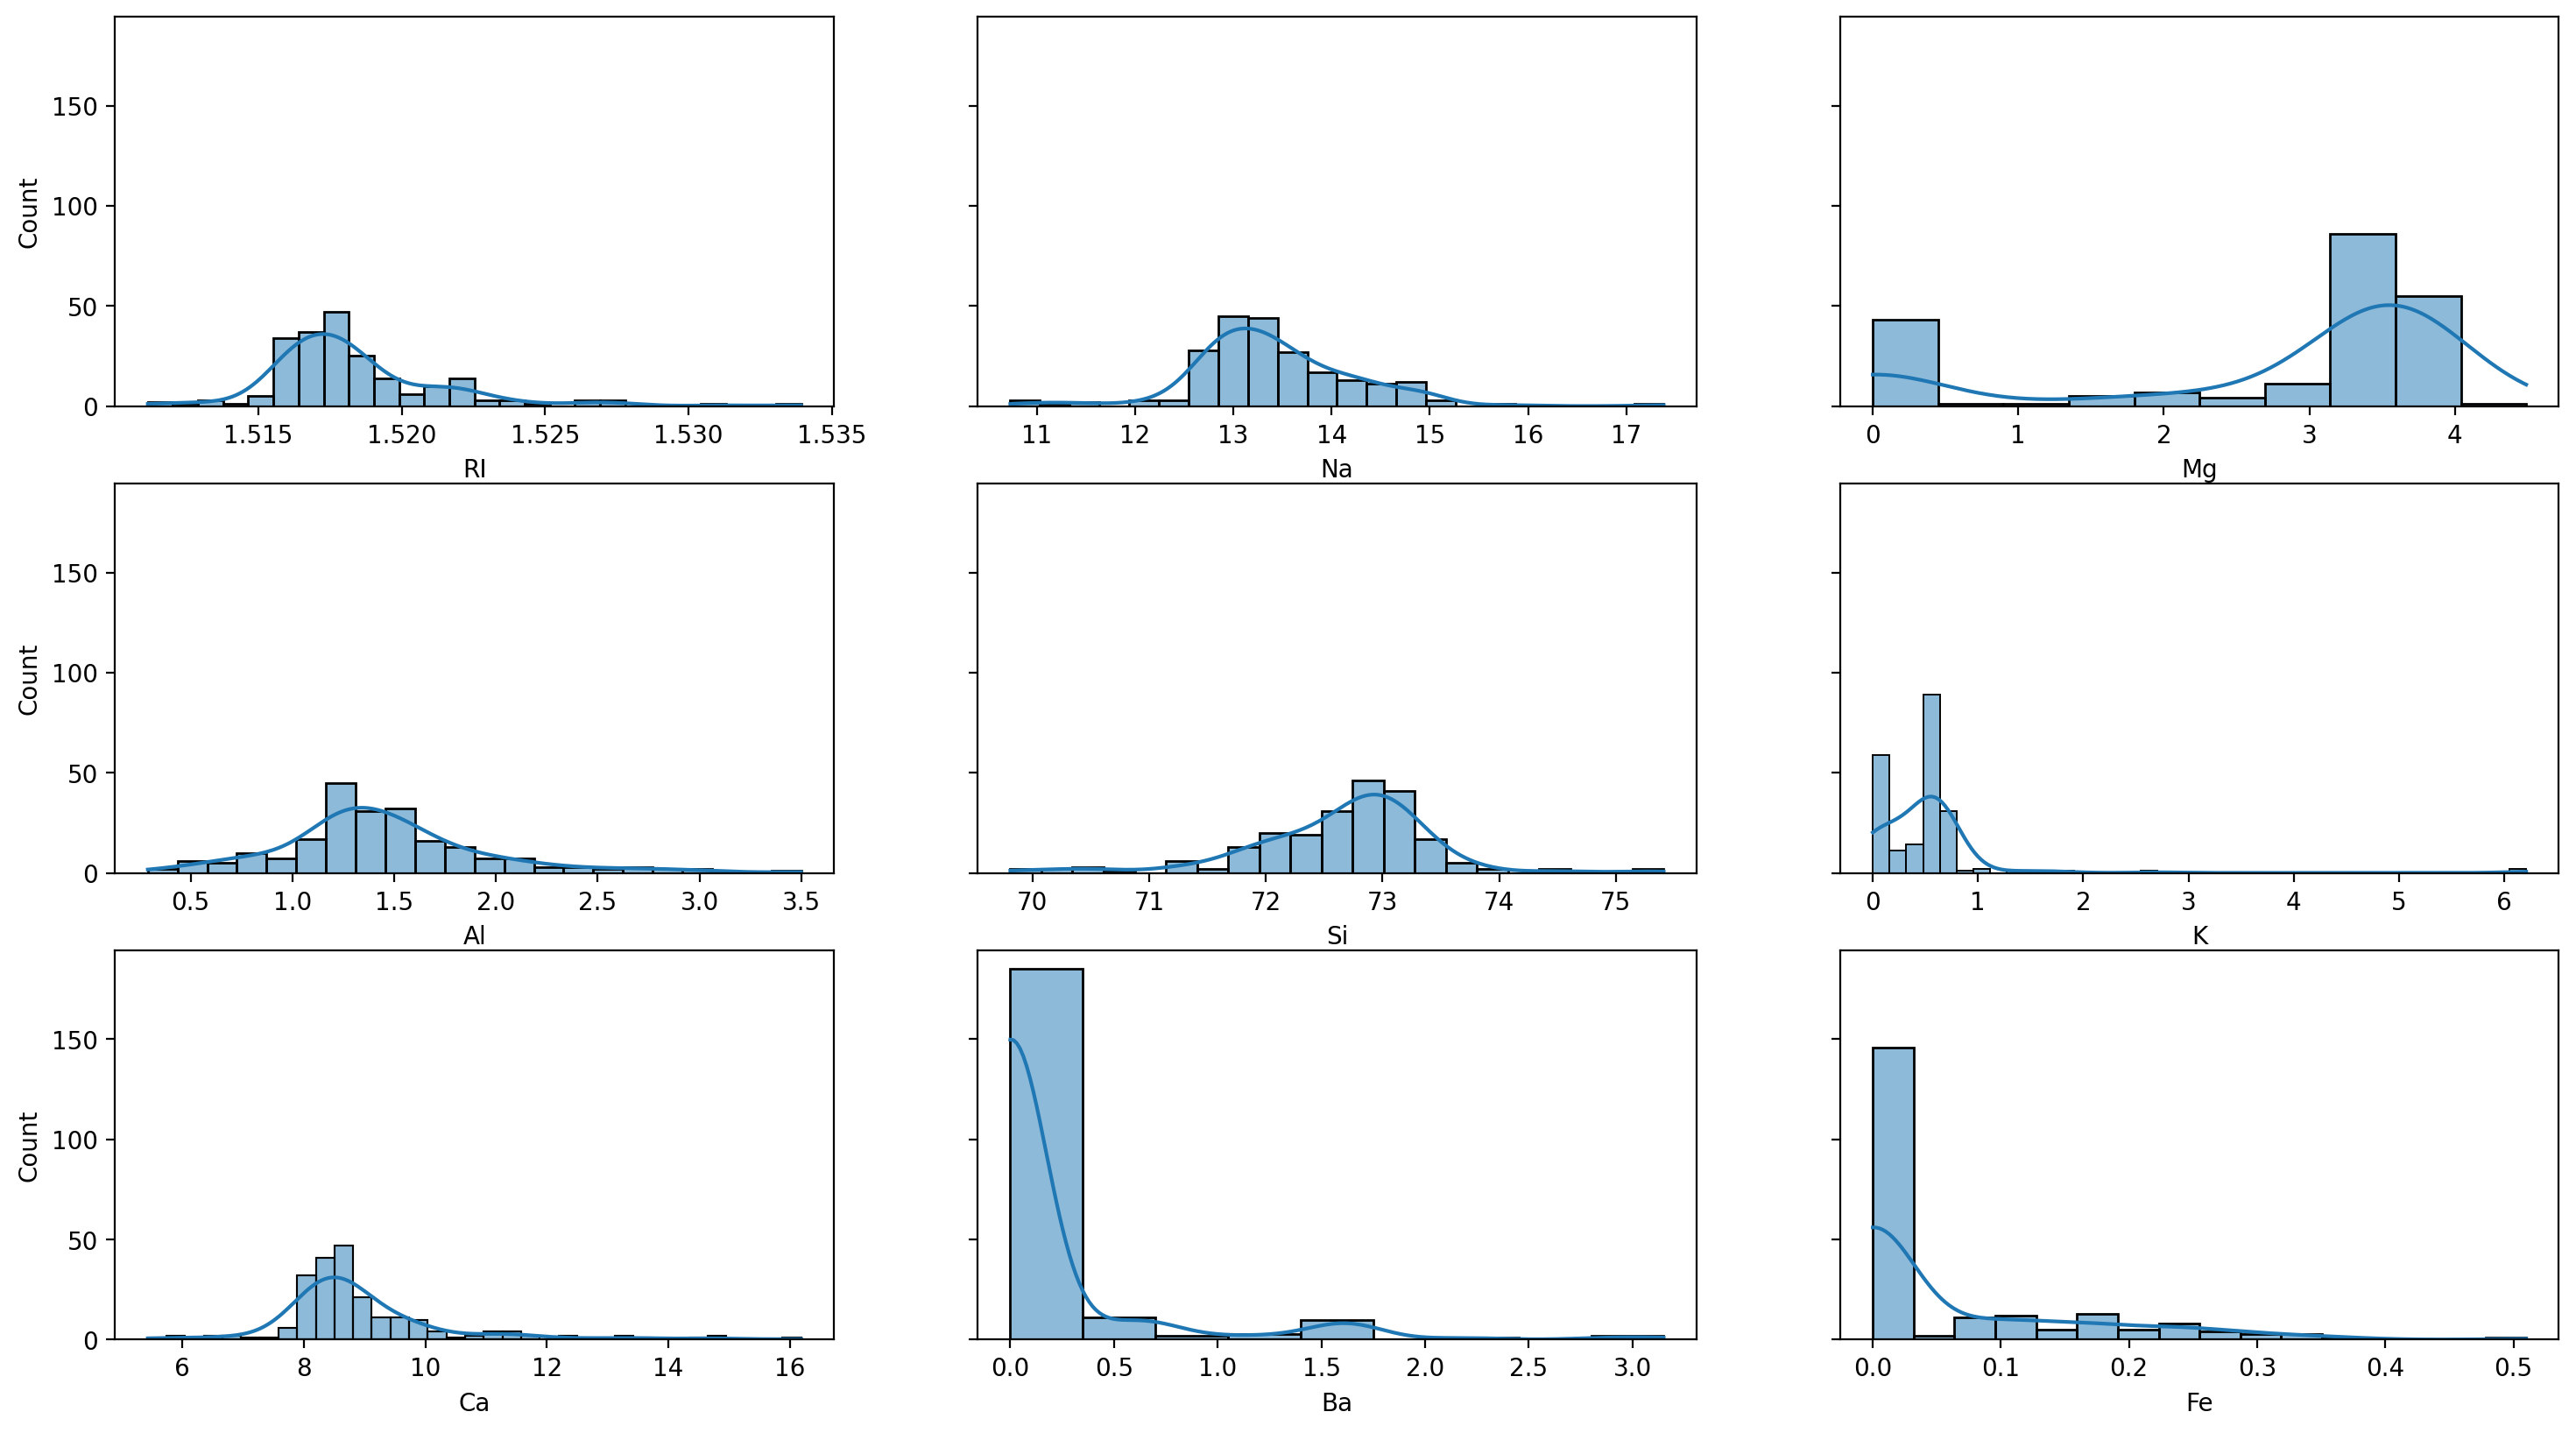

In [6]:
fig,ax= plt.subplots(3,3,figsize=(18,10),sharey=True,dpi=200)

sns.histplot(ax=ax[0,0],data=df,x='RI',kde=True)
sns.histplot(ax=ax[0,1],data=df,x='Na',kde=True)
sns.histplot(ax=ax[0,2],data=df,x='Mg',kde=True)
sns.histplot(ax=ax[1,0],data=df,x='Al',kde=True)
sns.histplot(ax=ax[1,1],data=df,x='Si',kde=True)
sns.histplot(ax=ax[1,2],data=df,x='K',kde=True)
sns.histplot(ax=ax[2,0],data=df,x='Ca',kde=True)
sns.histplot(ax=ax[2,1],data=df,x='Ba',kde=True)
sns.histplot(ax=ax[2,2],data=df,x='Fe',kde=True)


In [7]:
# Checking total types of categories of target variable
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
## Checking the output variable
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

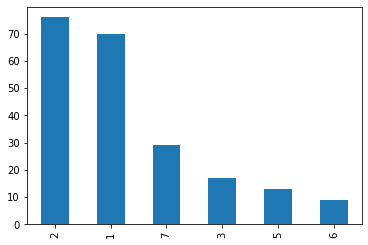

In [9]:
df['Type'].value_counts().plot.bar()

From the above plot,it can be seen that given dataset is an imbalanced dataset.

In [10]:
arr=df.values
X=arr[:,:-1]
Y=arr[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

# fit scaler on training dataset
scaler.fit(X_train)

# transform training dataset
X_train= scaler.transform(X_train)

# transform test dataset
X_test = scaler.transform(X_test)

In [13]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(Y)


'multiclass'

## Creating base model of KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [15]:
# Defining base model
model=KNeighborsClassifier(n_neighbors = 3)

# model evaluation method
cv1= StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='recall_micro', cv=cv1, n_jobs=-1)

# Mean accuracy
print("The mean recall for base model is:",np.mean(scores))

The mean recall for base model is: 0.6776301218161682


In [16]:
## Fitting the model and making predictions

knn1= KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train,Y_train)
pred1=knn1.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

         1.0       0.48      0.44      0.46        25
         2.0       0.39      0.65      0.49        17
         3.0       0.00      0.00      0.00         7
         5.0       0.67      0.50      0.57         4
         6.0       1.00      0.25      0.40         4
         7.0       0.71      0.62      0.67         8

    accuracy                           0.46        65
   macro avg       0.54      0.41      0.43        65
weighted avg       0.48      0.46      0.45        65



In [18]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(Y_test, pred1)
conf_matrix1

array([[11, 11,  3,  0,  0,  0],
       [ 5, 11,  0,  1,  0,  0],
       [ 5,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  1,  2],
       [ 2,  1,  0,  0,  0,  5]], dtype=int64)

## Comparing training and testing set precision with different n_neighbors values

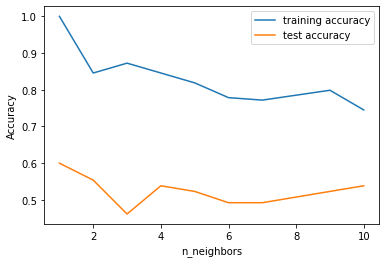

In [19]:
train_accuracy=[]
test_accuracy=[]
i=range(1,11)

for n_neighbors in i:
    
    knn2=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn2.fit(X_train,Y_train)
    
    score_train=knn2.score(X_train,Y_train)
    score_test=knn2.score(X_test,Y_test)
    
    train_accuracy.append(score_train)
    test_accuracy.append(score_test)
    
plt.plot(i, train_accuracy, label="training accuracy")
plt.plot(i, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## Parameter tuning using GridSearchCV

In [20]:
## parameters of base model
knn1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [21]:
from sklearn.model_selection import GridSearchCV

new_params={'n_neighbors':[x for x in range(2,16)],
            'metric':['canberra','euclidean','minkowski']}

knn_grid=GridSearchCV(knn1,param_grid = new_params, cv =cv1,scoring='recall_micro', n_jobs = -1, verbose = 2)

knn_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:    0.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]},
             scoring='recall_micro', verbose=2)

In [22]:
# Finding best parameter after tuning 

print("Best score for GridSearchCV is:",knn_grid.best_score_)
print("Optimal parameters for GridSearchCV is:",knn_grid.best_params_)       

Best score for GridSearchCV is: 0.7726436781609196
Optimal parameters for GridSearchCV is: {'metric': 'canberra', 'n_neighbors': 7}


In [23]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= knn_grid.best_params_

knn3=KNeighborsClassifier(n_neighbors=d1['n_neighbors'],metric=d1['metric'])
knn3.fit(X_train,Y_train)

pred3=knn3.predict(X_test)

In [24]:
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

         1.0       0.56      0.80      0.66        25
         2.0       0.47      0.53      0.50        17
         3.0       0.00      0.00      0.00         7
         5.0       1.00      0.25      0.40         4
         6.0       1.00      0.25      0.40         4
         7.0       0.88      0.88      0.88         8

    accuracy                           0.58        65
   macro avg       0.65      0.45      0.47        65
weighted avg       0.57      0.58      0.54        65



H:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
conf_matrix2=confusion_matrix(Y_test, pred3)
conf_matrix2

array([[20,  5,  0,  0,  0,  0],
       [ 8,  9,  0,  0,  0,  0],
       [ 6,  1,  0,  0,  0,  0],
       [ 1,  2,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1,  1],
       [ 1,  0,  0,  0,  0,  7]], dtype=int64)

## Plotting confusion matrix of base model and tuned model

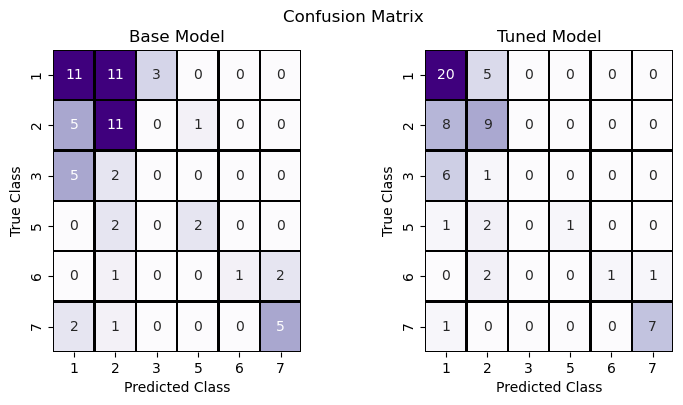

In [26]:
fig, ax= plt.subplots(1,2, figsize=(8,4),dpi=100)

xlabels=[1,2,3,5,6,7]
ylabels=[1,2,3,5,6,7]

sns.heatmap(conf_matrix1,ax=ax[0],annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[0].set_title('Base Model')

sns.heatmap(conf_matrix2,ax=ax[1],annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[1].set_title('Tuned Model')

ax[0].set_xlabel('Predicted Class')
ax[0].set_ylabel('True Class')

ax[1].set_xlabel('Predicted Class')
ax[1].set_ylabel('True Class')

fig.suptitle("Confusion Matrix")
plt.subplots_adjust(wspace=0.5)

plt.show()

+ It can be seen that this model works good for predicting all types of glass except type 3.
+ Tuning the model has increased the recall value i.e. the model's efficiency to detect the categories correctly has increased.